# Assignment 5

In [1]:
import netCDF4 as nc
import glob
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML

In [2]:
l = glob.glob('./*.nc4' , recursive = True)
l = sorted(l)

In [3]:
nc_file = nc.Dataset(l[0])
lons = nc_file.variables['nlon'][:]
lats = nc_file.variables['nlat'][:]
lon_0 = lons.mean()
lat_0 = lats.mean()

### Getting monthly mean and variation 

In [4]:
main_data = np.zeros((len(lons), len(lats), 12))

def get_data(name,i):
    nc_file = nc.Dataset(name)
    lons = nc_file.variables['nlon'][:]
    lats = nc_file.variables['nlat'][:]
    preci = nc_file.variables['surfacePrecipitation'][:,:]
    preci[preci == 0] = np.nan
    main_data[:,:,i] = preci
    
    mean = np.nanmean(preci)
    var = np.nanvar(preci)
#     print(mean, var)
    return (mean, var)

### Plotting the table of mean and variance 

In [5]:
data = []
for i,name in enumerate(l):
    m , v = get_data(name, i)
    data.append([m,v])
data = np.array(data)
months = ['January' , 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
t = pd.DataFrame({ "Months" : months, "Mean" : data[:,0] , "variance" : data[:,1]})

In [8]:
HTML(t.to_html(index=False))

Months,Mean,variance
January,0.039399,0.014799
February,0.036886,0.006315
March,0.037123,0.004953
April,0.068498,0.020328
May,0.198043,0.129584
June,0.280392,0.133270
July,0.284398,0.122710
August,0.237430,0.088378
September,0.134249,0.045950
October,0.193310,0.065821


### Plotting the monthly precipitation mean 

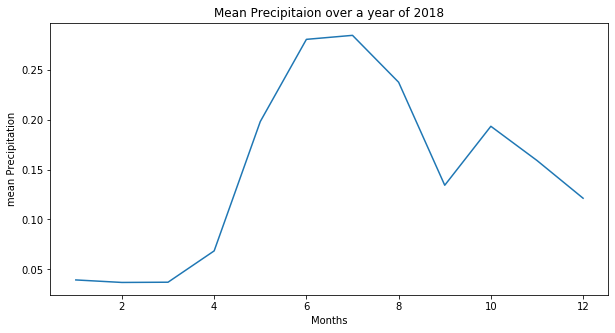

In [9]:
plt.figure(figsize=(10,5) )
y = data[:,0]
x = np.arange(1,13,1)
plt.xlabel('Months')
plt.ylabel('mean Precipitation')
plt.title('Mean Precipitaion over a year of 2018')
plt.plot(x,y)
plt.show()

### Spatial plots 

In [10]:
def get_spatial_plots(data,lon_0,lat_0, title):
    plt.figure(figsize=(20,15))
    nc_file = nc.Dataset(l[0])
    preci_units = nc_file.variables['surfacePrecipitation'].units
    
    m = Basemap(width = 3000000, height = 2500000, resolution = 'l', projection = 'stere', lat_ts = 40, lat_0=lat_0, lon_0 = lon_0)
    
    lon, lat = np.meshgrid(lons, lats)
    xi, yi = m(lon, lat)
    
    cs = m.pcolor(xi, yi, np.squeeze(np.fliplr(np.rot90(data,-1))))
    
    m.drawparallels(np.arange(-80. , 81. , 10.) , labels = [1,0,0,0], fontsize = 20)
    m.drawmeridians(np.arange(-180. , 181. , 10.) , labels = [0,0,0,1], fontsize = 20)
    
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    
    cbar = m.colorbar(cs, location = 'bottom', pad = "10%")
    cbar.set_label(preci_units)
    plt.title(title, fontsize=30)
    plt.show()

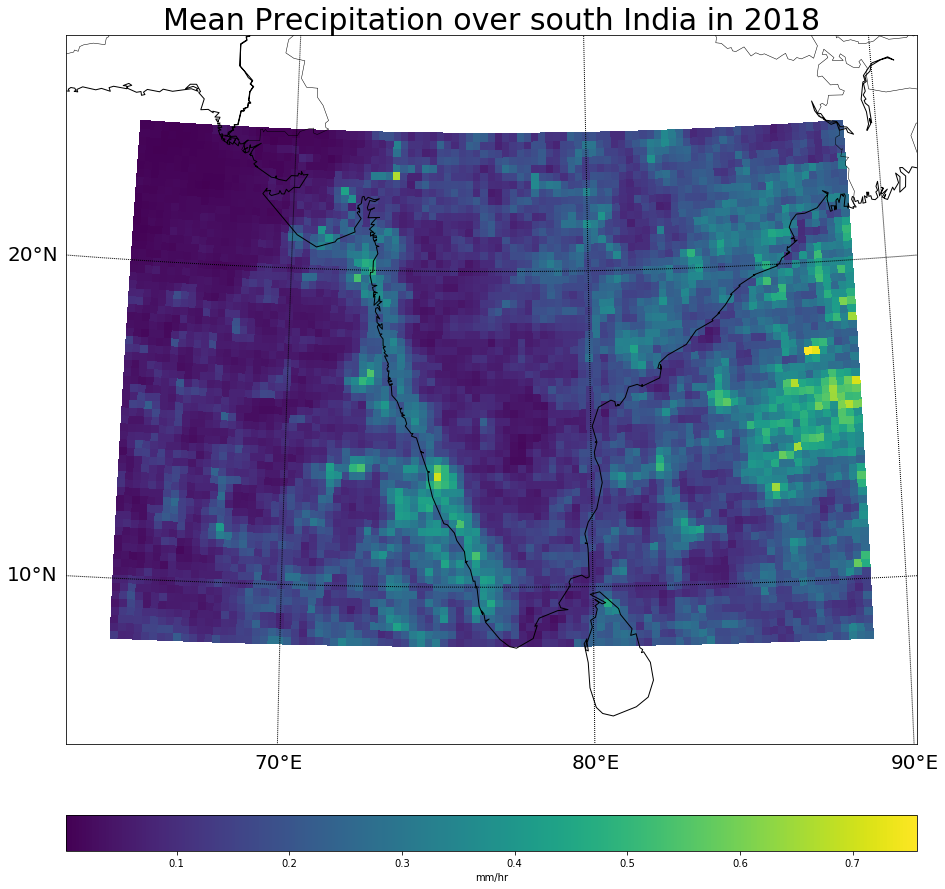

In [11]:
title = "Mean Precipitation over south India in 2018"
main_mean = np.nanmean(main_data, axis = 2)
get_spatial_plots(main_mean,lon_0 = lon_0,lat_0 = lat_0, title = title)

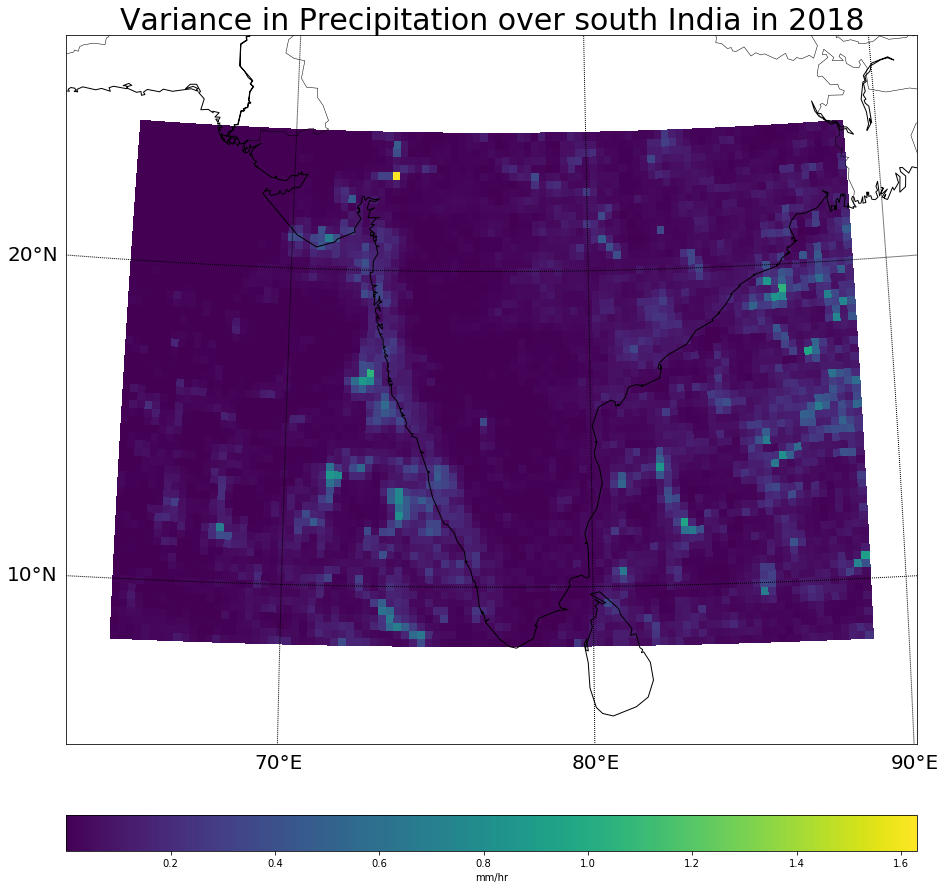

In [12]:
title = "Variance in Precipitation over south India in 2018"
main_mean = np.nanvar(main_data, axis = 2)
get_spatial_plots(main_mean,lon_0 = lon_0,lat_0 = lat_0, title = title)